Hurst Exponent: 0.8849764012912353
Fractal Dimension: 0.9802023893502629


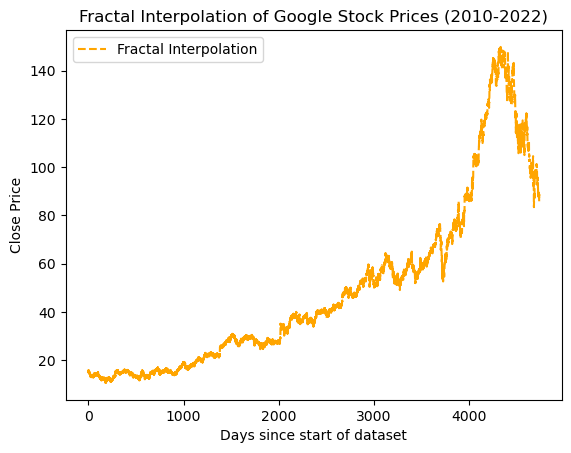

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Extract control points: Use Date and Close price
control_points = google_training_complete[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Calculate the Hurst exponent
def hurst_exponent(ts):
    mean_ts = np.mean(ts)
    cum_dev = np.cumsum(ts - mean_ts)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    return np.log(R / S) / np.log(len(ts))

hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

# Calculate the fractal dimension using box counting
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))    ## It gives all the unique element of an array.
        counts.append(count)
    
    return counts

box_sizes = np.logspace(0.1, 1, num=20)
box_counts = box_counting_dimension(control_points, box_sizes)

log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

# Plotting
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of dataset')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2010-2022)')
plt.legend()
plt.show()

Hurst Exponent: 0.8337937094675354
Fractal Dimension: 0.7818259259394359


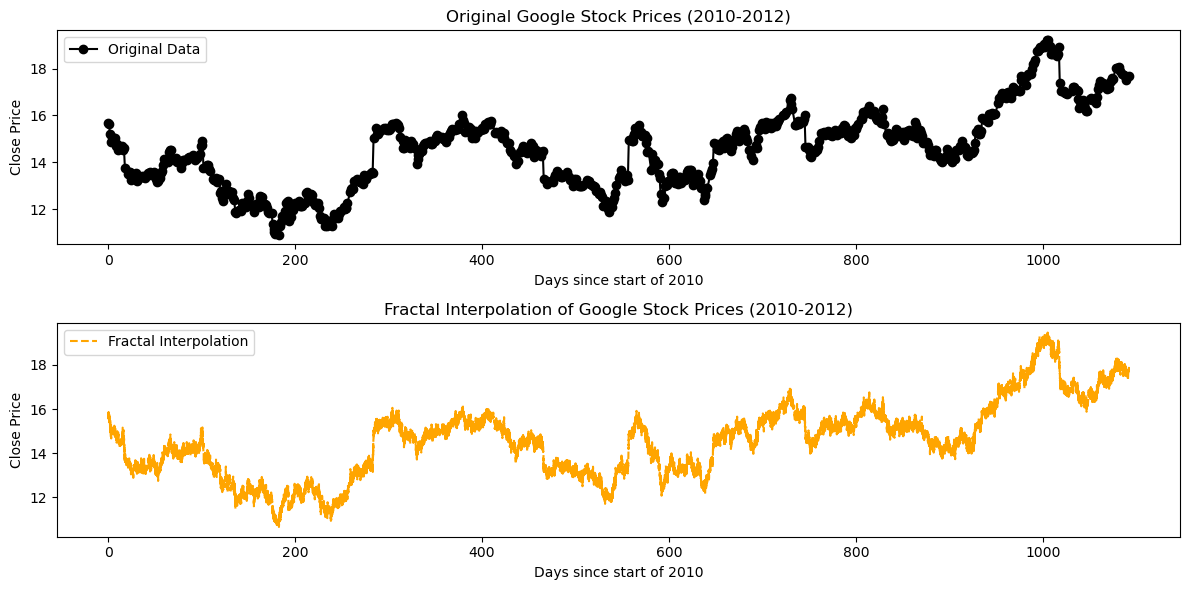

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for the first two years (2010-2012)
google_training_complete_2010_2012 = google_training_complete[
    (google_training_complete['Date'].dt.year >= 2010) & 
    (google_training_complete['Date'].dt.year <= 2012)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_2010_2012[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Calculate the Hurst exponent
def hurst_exponent(ts):
    mean_ts = np.mean(ts)
    cum_dev = np.cumsum(ts - mean_ts)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    return np.log(R / S) / np.log(len(ts))

hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

# Calculate the fractal dimension using box counting
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))
        counts.append(count)
    
    return counts

box_sizes = np.logspace(0.1, 1, num=20)
box_counts = box_counting_dimension(control_points, box_sizes)

log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

# Create separate plots
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Original Data')  # Black solid line for original data
plt.xlabel('Days since start of 2010')
plt.ylabel('Close Price')
plt.title('Original Google Stock Prices (2010-2012)')
plt.legend()

# Plot fractal interpolated data
plt.subplot(2, 1, 2)
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of 2010')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2010-2012)')
plt.legend()

plt.tight_layout()
plt.show()

Hurst Exponent: 0.8759101445515994
Fractal Dimension: 0.7923807184902134


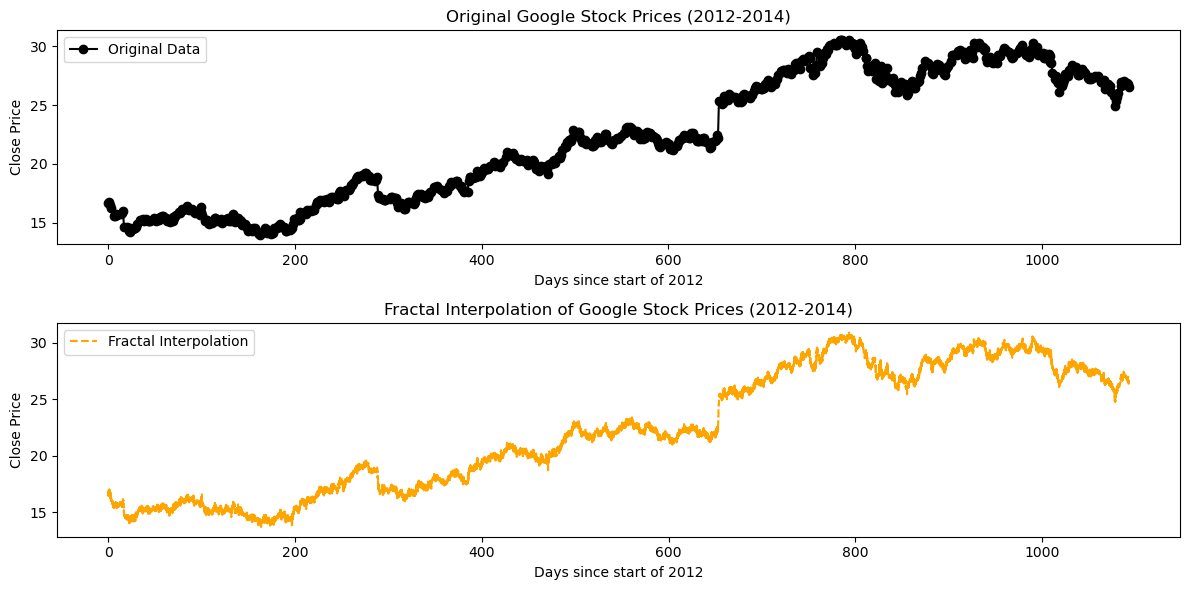

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for the years 2012 to 2014
google_training_complete_2012_2014 = google_training_complete[
    (google_training_complete['Date'].dt.year >= 2012) & 
    (google_training_complete['Date'].dt.year <= 2014)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_2012_2014[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Calculate the Hurst exponent
def hurst_exponent(ts):
    mean_ts = np.mean(ts)
    cum_dev = np.cumsum(ts - mean_ts)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    return np.log(R / S) / np.log(len(ts))

hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

# Calculate the fractal dimension using box counting
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))
        counts.append(count)
    
    return counts

box_sizes = np.logspace(0.1, 1, num=20)
box_counts = box_counting_dimension(control_points, box_sizes)

log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

# Create separate plots
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Original Data')  # Black solid line for original data
plt.xlabel('Days since start of 2012')
plt.ylabel('Close Price')
plt.title('Original Google Stock Prices (2012-2014)')
plt.legend()

# Plot fractal interpolated data
plt.subplot(2, 1, 2)
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of 2012')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2012-2014)')
plt.legend()

plt.tight_layout()
plt.show()

Hurst Exponent: 0.8559784285723642
Fractal Dimension: 0.8559077616646107


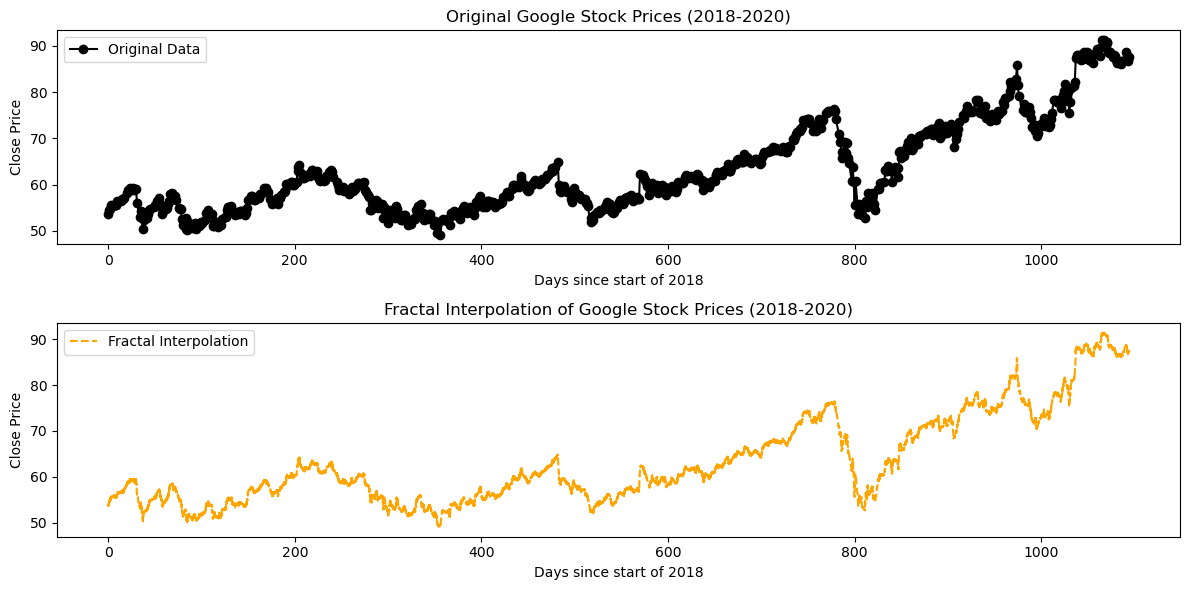

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for the years 2018 to 2020
google_training_complete_2018_2020 = google_training_complete[
    (google_training_complete['Date'].dt.year >= 2018) & 
    (google_training_complete['Date'].dt.year <= 2020)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_2018_2020[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Calculate the Hurst exponent
def hurst_exponent(ts):
    mean_ts = np.mean(ts)
    cum_dev = np.cumsum(ts - mean_ts)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    return np.log(R / S) / np.log(len(ts))

hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

# Calculate the fractal dimension using box counting
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))
        counts.append(count)
    
    return counts

box_sizes = np.logspace(0.1, 1, num=20)
box_counts = box_counting_dimension(control_points, box_sizes)

log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

# Create separate plots
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Original Data')  # Black solid line for original data
plt.xlabel('Days since start of 2018')
plt.ylabel('Close Price')
plt.title('Original Google Stock Prices (2018-2020)')
plt.legend()

# Plot fractal interpolated data
plt.subplot(2, 1, 2)
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of 2018')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2018-2020)')
plt.legend()

plt.tight_layout()
plt.show()

Hurst Exponent: 0.8715932140699904
Fractal Dimension: 0.9222044667314193


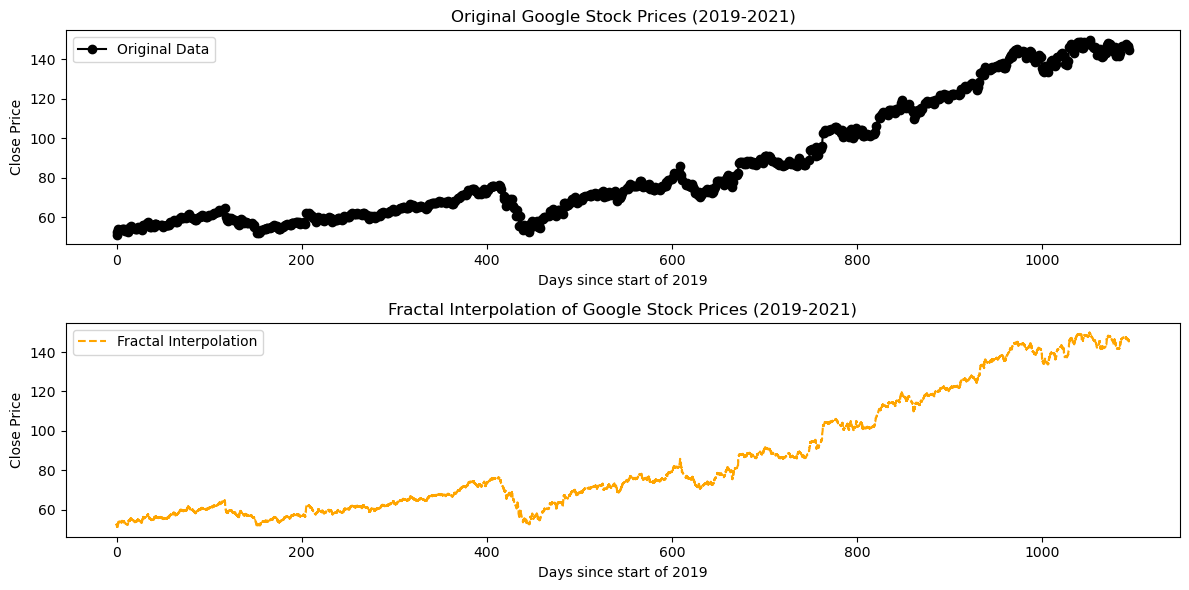

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for the years 2019 to 2021
google_training_complete_2019_2021 = google_training_complete[
    (google_training_complete['Date'].dt.year >= 2019) & 
    (google_training_complete['Date'].dt.year <= 2021)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_2019_2021[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Calculate the Hurst exponent
def hurst_exponent(ts):
    mean_ts = np.mean(ts)
    cum_dev = np.cumsum(ts - mean_ts)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts)
    return np.log(R / S) / np.log(len(ts))

hurst_value = hurst_exponent(control_points[:, 1])
print(f'Hurst Exponent: {hurst_value}')

# Calculate the fractal dimension using box counting
def box_counting_dimension(ts, box_sizes):
    counts = []
    
    for box_size in box_sizes:
        count = len(np.unique(np.floor(ts[:, 1] / box_size)))
        counts.append(count)
    
    return counts

box_sizes = np.logspace(0.1, 1, num=20)
box_counts = box_counting_dimension(control_points, box_sizes)

log_box_sizes = np.log(box_sizes)
log_counts = np.log(box_counts)
slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -slope
print(f'Fractal Dimension: {fractal_dimension}')

# Create separate plots
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Original Data')  # Black solid line for original data
plt.xlabel('Days since start of 2019')
plt.ylabel('Close Price')
plt.title('Original Google Stock Prices (2019-2021)')
plt.legend()

# Plot fractal interpolated data
plt.subplot(2, 1, 2)
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='--', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of 2019')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2019-2021)')
plt.legend()

plt.tight_layout()
plt.show()